In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from TileEM import *
from Qj_pTprime_models import *

In [24]:
DATA_DIR="sampletopworst5"
def runTileEM(objid,Tprimefunc,pTprimefunc,Qjfunc,A_percentile,Niter,DEBUG=False):
    '''
    Tfunc : how to get ground truth 
    Tprimefunc : how to pick T'
    pTprimefunc : Model used for computing p(T')
    Qjfunc : Model used for estimating Qj parameters
    objid,A_percentile
    '''
    tiles = pkl.load(open(DATA_DIR+"/vtiles{}.pkl".format(objid)))
    indMat = pkl.load(open(DATA_DIR+"/indMat{}.pkl".format(objid)))
    workers = pkl.load(open(DATA_DIR+"/worker{}.pkl".format(objid)))
    likelihood_lst=[]
    T_lst = []
    if DEBUG: print "Coming up with T' combinations to search through" 
    Tprime_lst = Tprimefunc(objid,indMat,fixedtopk=5, topk = 40,NTprimes=500)
    for _i in tqdm(range(Niter)):
        if _i ==0:
            T=initT(tiles,indMat)
        if DEBUG: print "E-step : Estimate Qj parameters"
        Qjhat = estimate_Qj(T,tiles,indMat,workers,Qjfunc,A_percentile)
        ####potentially adaptive way of getting a new set of T', currently a fixed set of T' #####
        if DEBUG: print "Mstep: Picking the max-likelihood T' " 
        Tidx,T, max_likelihood= computeT(objid,T,tiles,indMat,workers,Tprime_lst,Qjhat,pTprimefunc,A_percentile)
        likelihood_lst.append(max_likelihood)
        T_lst.append(Tidx)
    return T_lst,likelihood_lst

[autoreload of TileEM failed: Traceback (most recent call last):
  File "/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "TileEM.py", line 26
    visualizeTilesScore(tiles,tidx_score,INT_Z=True,colorful=True):
                                                                  ^
SyntaxError: invalid syntax
]


In [19]:
tidx_score = np.zeros(len(tiles))
pTprime_lst= [123,412,124]
Tprime_idx=[1,3,18]
for i,tidx in enumerate(Tprime_idx):
    tidx_score[Tprime_idx[i]]=pTprime_lst[i]

In [23]:
tidx_score

array([   0.,  123.,    0.,  412.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        124.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.])

In [ ]:
for tidx in Tprime_idx]

In [13]:
def computeT(objid,T,tiles,indMat,workers,Tprime_lst,Qj,pTprimefunc,A_percentile,PLOT_LIKELIHOOD=False):
    # Loop through Tprime_lst find the argmax T' s.t pTprime is max given fixed Qj
    pTprime_lst =[]
    for Tprime_idx in Tprime_lst:
        pTprime = pTprimefunc(objid,Tprime_idx,Qj,T,tiles,indMat,workers,A_percentile)
        pTprime_lst.append(pTprime)
    Tidx= np.argmax(pTprime_lst)
    max_likelihood =pTprime_lst[Tidx]
    if PLOT_LIKELIHOOD:
        tidx_score = np.zeros(len(tiles))
        pTprime_lst= [123,412,124]
        Tprime_idx=[1,3,18]
        for i,tidx in enumerate(Tprime_idx):
            tidx_score[Tprime_idx[i]]=pTprime_lst[i]
    	visualizeTilesScore(tiles,tidx_score,INT_Z=True,colorful=True):
    return Tprime_lst[Tidx],join_tiles(Tprime_lst[Tidx],tiles)[0],max_likelihood

[[16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108],
 [16, 107, 95, 109, 53, 108]]

In [9]:
T_lst,likelihood_lst = runTileEM(47,Tprime_snowball_area,pTprimeGTLSA,QjGTLSA,99,20)

In [ ]:
def initT(tiles,indMat):
    #In the initial step, we pick T to be the top 5 majority vote tile joined
    votes =indMat[:-1].sum(axis=0)
    tidx = np.argsort(votes)[::-1][:5]
    return join_tiles(tidx,tiles)[0]

In [39]:
tiles = pkl.load(open(DATA_DIR+"/vtiles{}.pkl".format(objid)))
indMat = pkl.load(open(DATA_DIR+"/indMat{}.pkl".format(objid)))
workers = pkl.load(open(DATA_DIR+"/worker{}.pkl".format(objid)))
#In the initial step, we pick T to be the top 5 majority vote tile joined
votes =indMat[:-1].sum(axis=0)
tidx = np.argsort(votes)[::-1][:5]

In [41]:
area = indMat[-1]

(array([ 110.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,    1.]),
 array([  1.38201189e-08,   1.00000012e-01,   2.00000011e-01,
          3.00000010e-01,   4.00000008e-01,   5.00000007e-01,
          6.00000006e-01,   7.00000004e-01,   8.00000003e-01,
          9.00000001e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

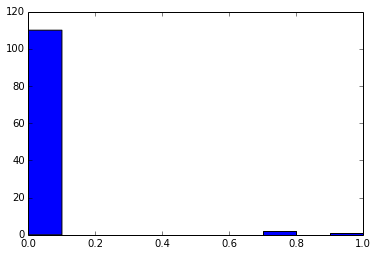

In [47]:
plt.hist(area/max(area))

(array([  7.,  12.,  12.,   9.,  22.,  18.,  15.,  12.,   2.,   4.]),
 array([ 0.02631579,  0.12368421,  0.22105263,  0.31842105,  0.41578947,
         0.51315789,  0.61052632,  0.70789474,  0.80526316,  0.90263158,  1.        ]),
 <a list of 10 Patch objects>)

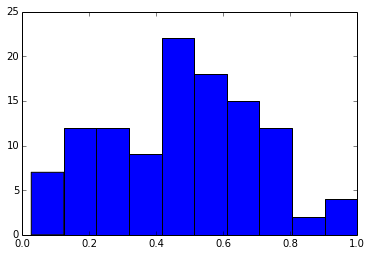

In [49]:
plt.hist(votes/max(votes))

(array([ 17.,  20.,  33.,  29.,   9.,   4.,   0.,   0.,   0.,   1.]),
 array([ 0.05746112,  0.2283588 ,  0.39925649,  0.57015417,  0.74105186,
         0.91194954,  1.08284722,  1.25374491,  1.42464259,  1.59554027,
         1.76643796]),
 <a list of 10 Patch objects>)

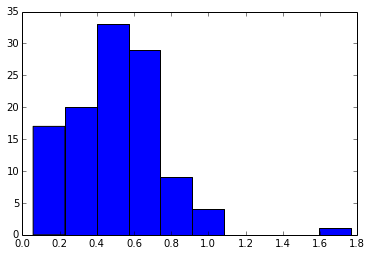

In [56]:
plt.hist(area/max(area)+votes/max(votes))

In [70]:
norm_area_vote = area/max(area)+2*votes/max(votes)

In [81]:
tidx = np.argsort(norm_area_vote)[::-1][:5]

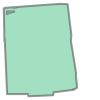

In [84]:
join_tiles(tidx,tiles)[0]

In [ ]:
def initT(tiles,indMat):
    # In the initial step, we pick T to be the top 5 area-vote score
    # where we combine the area and vote in a 1:2 ratio
    votes =indMat[:-1].sum(axis=0)
    norm_area_vote = area/max(area)+2*votes/max(votes)
    tidx = np.argsort(norm_area_vote)[::-1][:5]
    return join_tiles(tidx,tiles)[0]

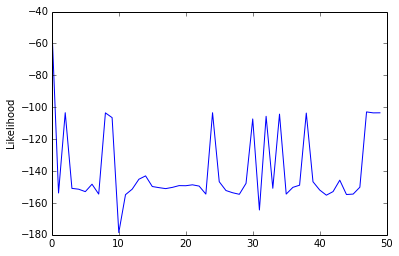

In [35]:
plt.plot(likelihood_lst)
plt.ylabel("Likelihood")

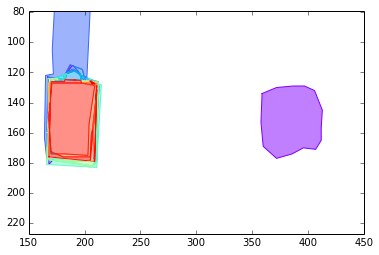

In [33]:
objid =47
tiles = pkl.load(open(DATA_DIR+"/vtiles{}.pkl".format(objid)))
visualizeTilesSeparate(tiles)

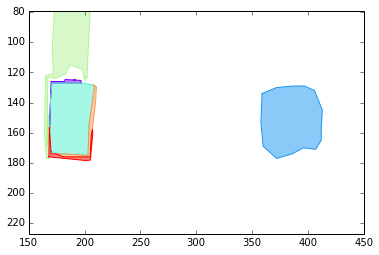

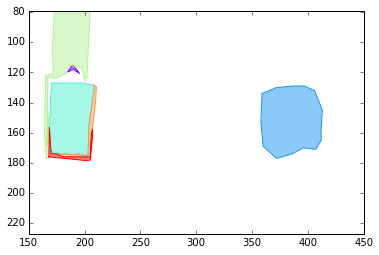

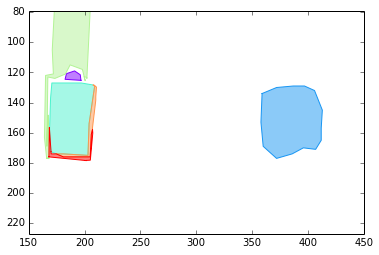

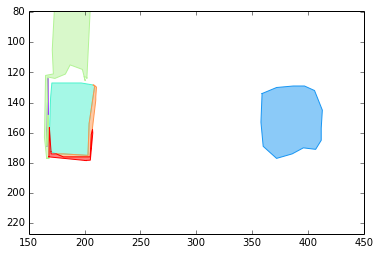

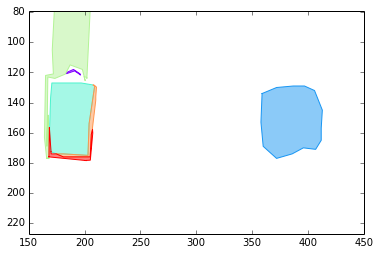

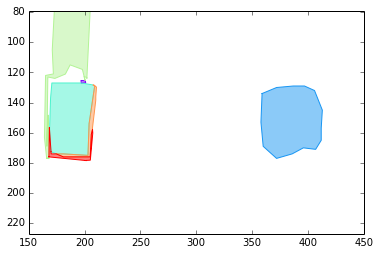

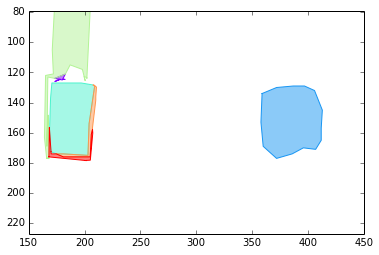

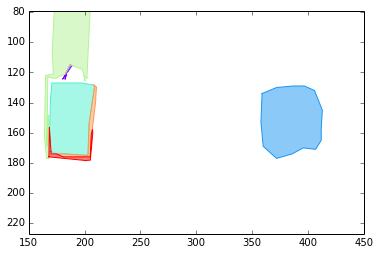

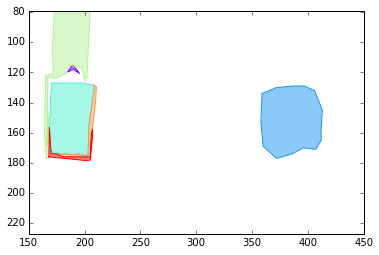

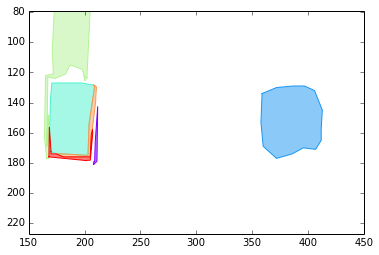

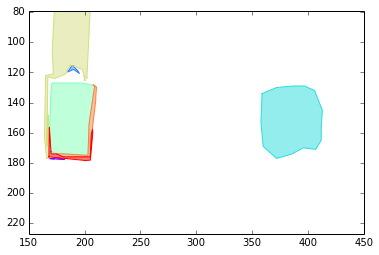

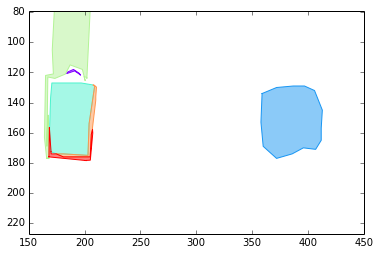

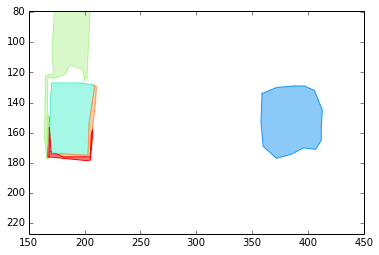

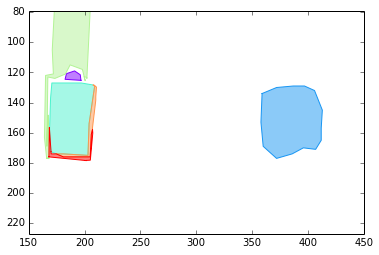

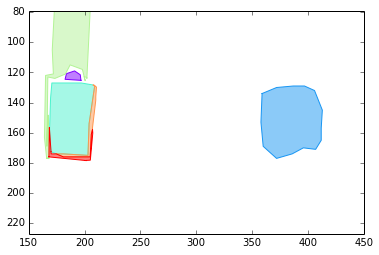

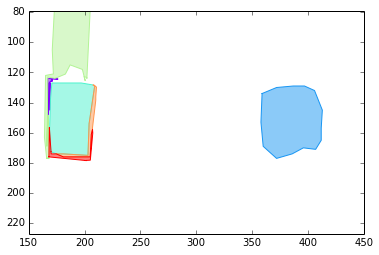

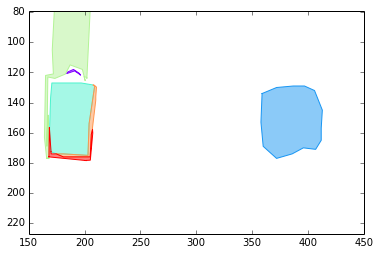

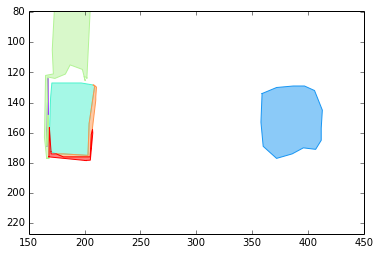

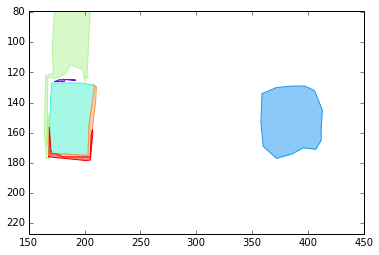

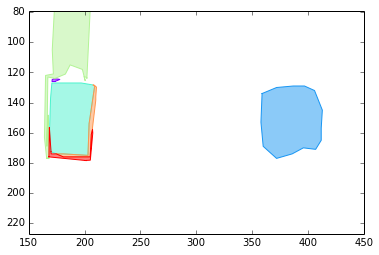

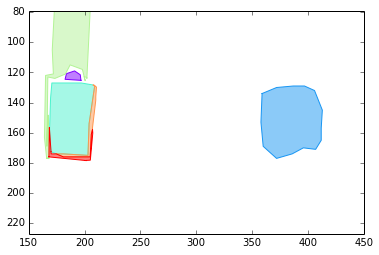

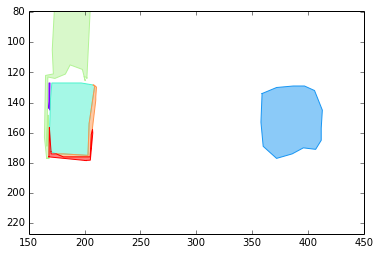

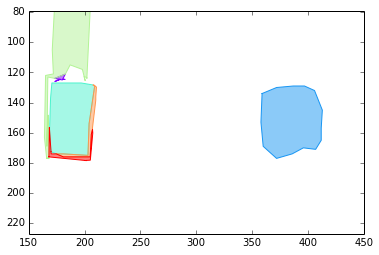

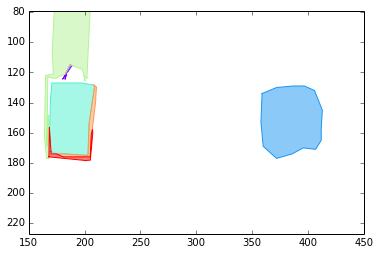

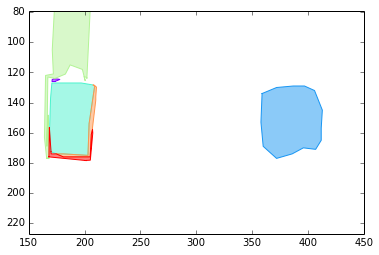

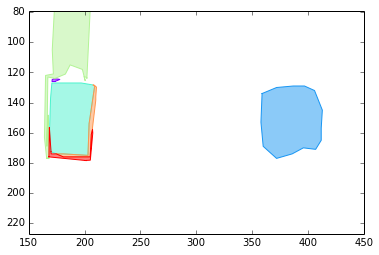

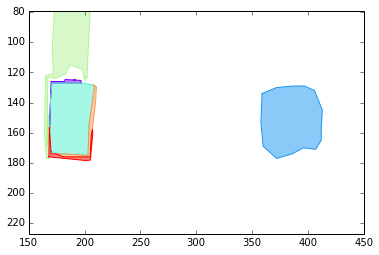

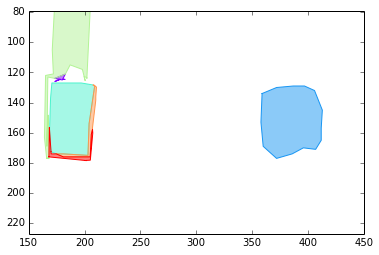

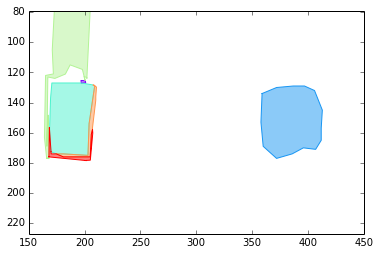

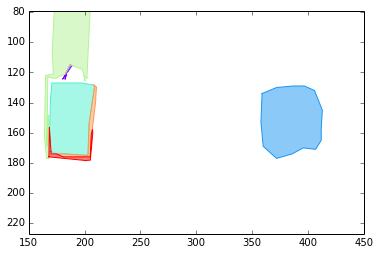

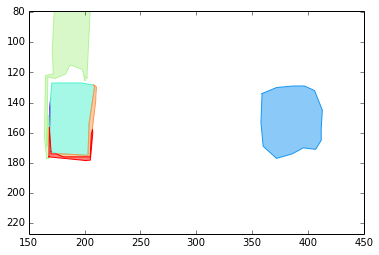

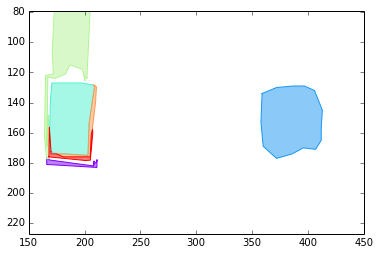

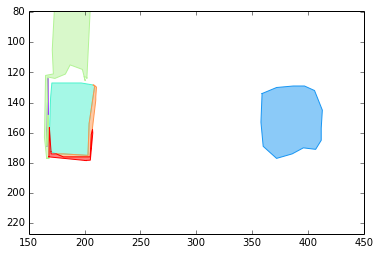

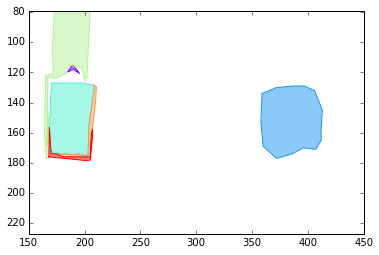

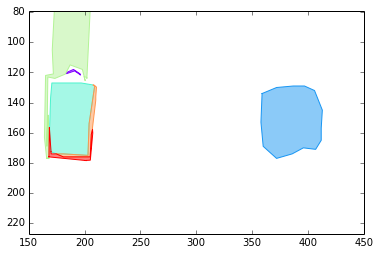

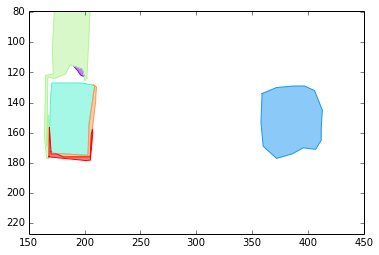

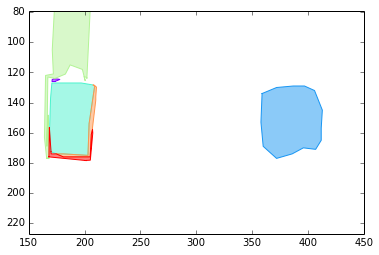

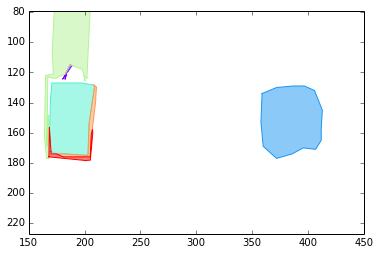

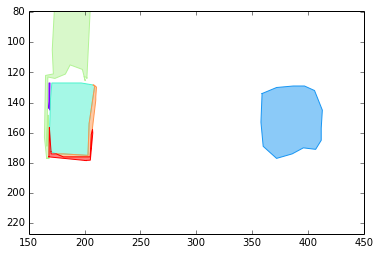

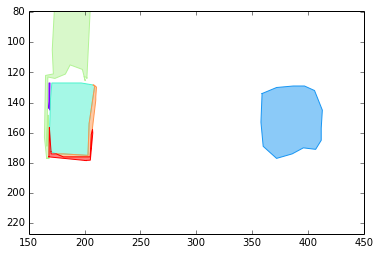

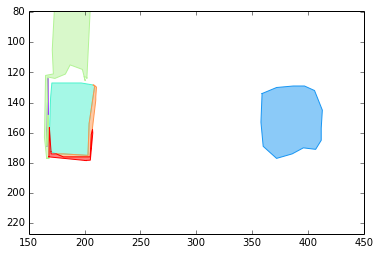

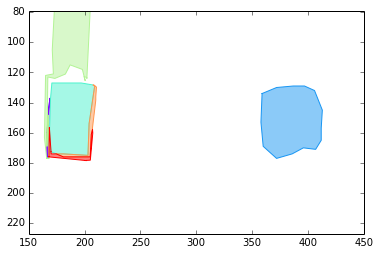

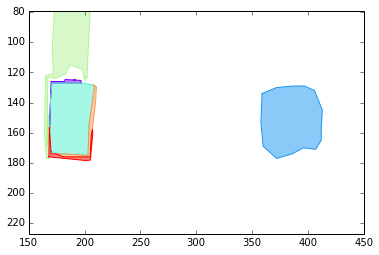

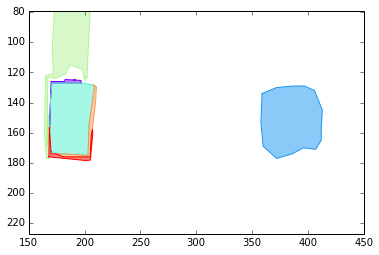

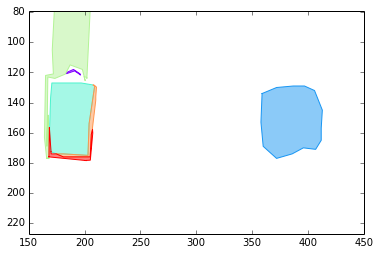

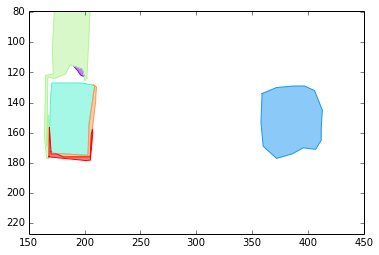

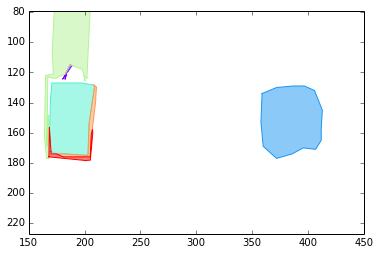

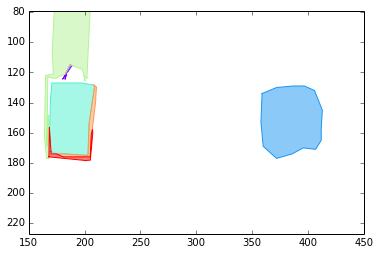

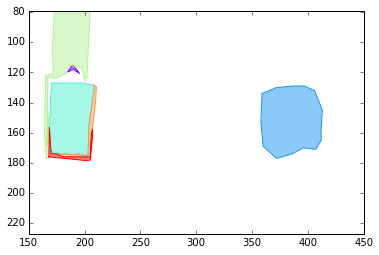

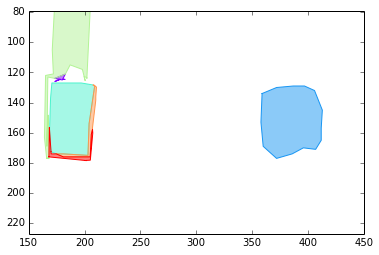

In [36]:
for T in T_lst:
    plt.figure()
    visualizeTilesSeparate(np.array(tiles)[T])

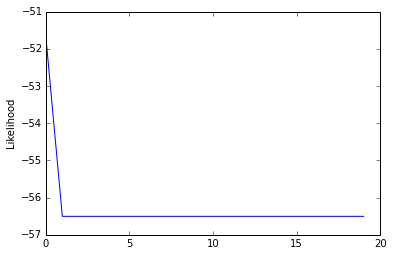

In [10]:
plt.plot(likelihood_lst)
plt.ylabel("Likelihood")

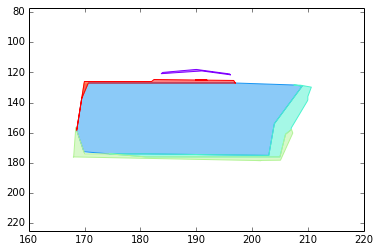

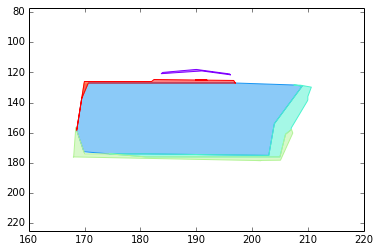

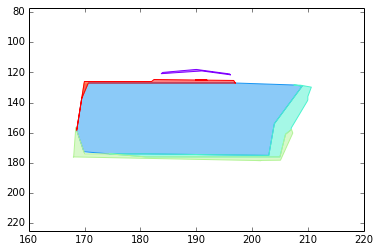

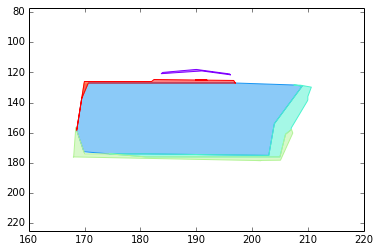

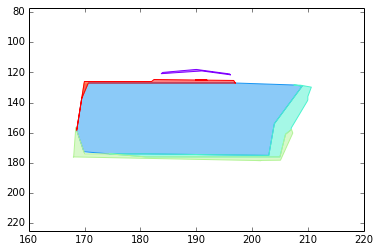

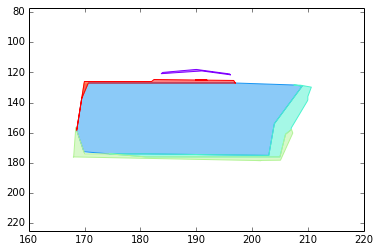

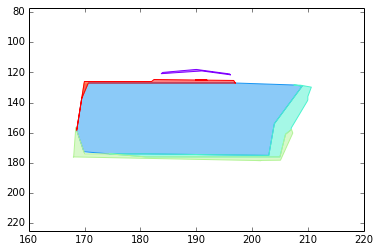

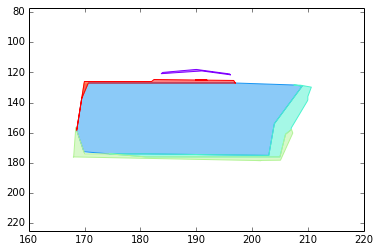

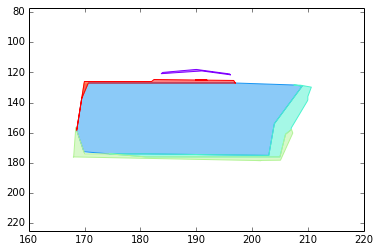

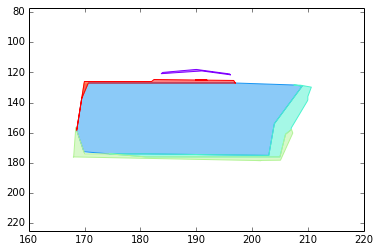

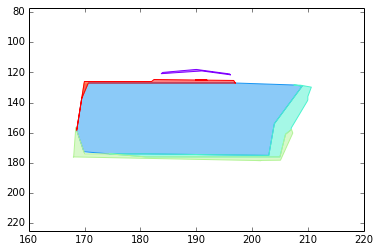

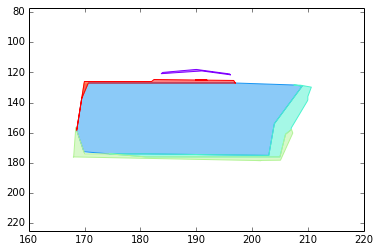

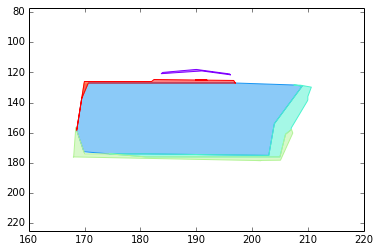

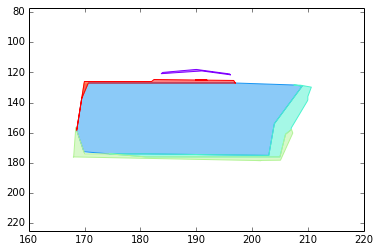

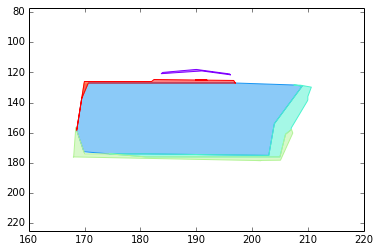

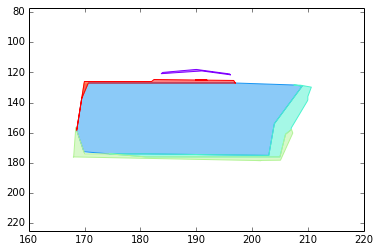

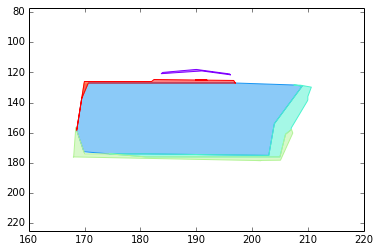

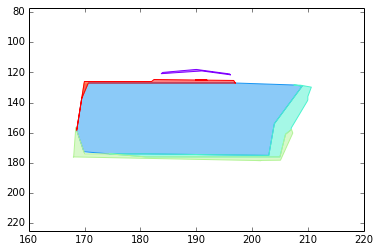

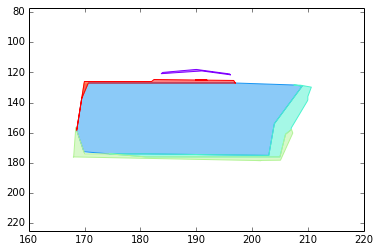

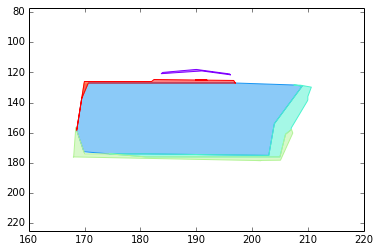

In [12]:
objid=47
tiles = pkl.load(open(DATA_DIR+"/vtiles{}.pkl".format(objid)))
for T in T_lst:
    plt.figure()
    visualizeTilesSeparate(np.array(tiles)[T])